In [ ]:
'''
Accuracy - how many correct predictions out of total predictions

odds - probability of success against probability of failure. For example, with winning percentage of 80%, odds will be 8:2 or 4:1
    log odds is the distance of the point from the seperator line
    log odds follow a linear curve: Similar relation to that of sigmoid function 

Multi class classification
    OVR - one versus rest: Do logistic binary regression for all the classes and hence for n classifications, there will be n models


Accuracy metric 
    



'''

# logisitic Regression implementation

In [4]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_churn=pd.read_csv(r'C:\Users\Mayank Bhatia\Documents\GitHub\DSML\13_intro_to_ml_nn\13.9_intro_to_ml_logistic_regression_2\churn_logistic.csv')

In [ ]:
# for the ease of understanding, we will restrict the data to only 5 columns


# splitting data
df_churn_2=df_churn[['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']]
df_y=df_churn['Churn']
x_mid,x_test,y_mid,y_test=train_test_split(df_churn_2,df_y,test_size=0.2,random_state=1)
x_train,x_val,y_train,y_val=train_test_split(x_mid,y_mid,test_size=0.2,random_state=1)

# Scaling Data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)
x_test_scaled=scaler.transform(x_test)

# Training data
model=LogisticRegression()
model.fit(x_train,y_train)

# Model metrics
print(model.coef_)
print(model.intercept_)

output=model.predict(x_train)

[[0.01092173 0.00550737 0.00257142 0.49519757 0.00128224]]
[-4.81327749]


# Accuracy metric

In [25]:
def logsitic_accuracy(y_act,y_pred):
    return(np.sum(y_pred==y_act)/y_act.shape[0])

print(logsitic_accuracy(y_train,output))
print(logsitic_accuracy(y_val,model.predict(x_val)))
print(logsitic_accuracy(y_test,model.predict(x_test)))

0.7047697368421053
0.7050438596491229
0.7026315789473684


# Hyperparameter tuning

In [42]:
scaler=StandardScaler()
alpha=[]
train_scores=[]
val_scores=[]

for i in np.arange(0.01, 5000.0, 100):
    alpha.append(i)
    pl=make_pipeline(scaler,LogisticRegression(C=1/i))
    pl.fit(x_train,y_train)
    train_scores.append(logsitic_accuracy(y_train,pl.predict(x_train)))
    val_scores.append(logsitic_accuracy(y_val,pl.predict(x_val)))

500.01
0.7083333333333334
0.7160087719298246
0.706140350877193
0.706140350877193


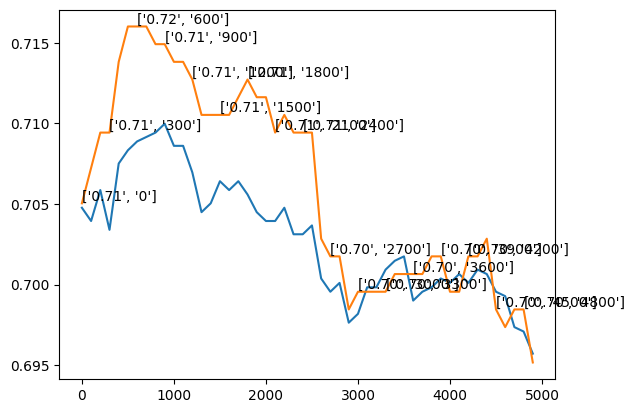

In [ ]:
sns.lineplot(x=alpha,y=train_scores)
sns.lineplot(x=alpha,y=val_scores)
for i, j in zip(alpha[::3], val_scores[::3]):
    plt.text(i,j,[f'{np.round(j,2):.2f}',f'{np.round(i):.0f}'],va='bottom')
print(alpha[val_scores.index(np.max(val_scores))])


# GETTING BEST RESULTS FOR ALPHA = 500

# FINAL RESULTS

pl_fin=make_pipeline(scaler,LogisticRegression(C=1/500))
pl_fin.fit(x_train,y_train)

print(logsitic_accuracy(y_train,pl_fin.predict(x_train)))
print(logsitic_accuracy(y_val,pl_fin.predict(x_val)))
print(logsitic_accuracy(y_test,pl_fin.predict(x_test)))

print(pl_fin.score(x_test,y_test)) # Same the way i defined the function


# Multi class from logistic regression

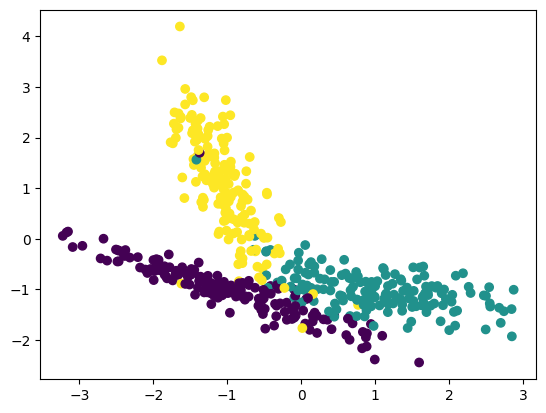

In [3]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [10]:
model=LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)

c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mayank Bhatia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [11]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')


Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


# Assignment